In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('mpg')
df.shape

(398, 9)

In [3]:
df= df.fillna(0)

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# 데이터 셋 나누기 

In [6]:
from sklearn.model_selection import train_test_split

train_test_split?

In [7]:
label_name = 'origin'

In [8]:
X = df.drop(['origin','name'], axis=1)
X.shape

(398, 7)

In [9]:
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [10]:
y = df[label_name]
y.shape

(398,)

In [11]:
y.head()

0    usa
1    usa
2    usa
3    usa
4    usa
Name: origin, dtype: object

In [12]:
df.fillna(0)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [14]:
X_train.shape

(266, 7)

In [15]:
X_test.shape

(132, 7)

In [16]:
y_train.shape

(266,)

In [17]:
y_test.shape

(132,)

## 학습과 예측 하기 

In [18]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
y_pred = model.predict(X_test)

## 측정하기

In [21]:
(y_test == y_pred).mean() *100

73.48484848484848

In [22]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)



0.7348484848484849

In [23]:
# 피처중요도


In [24]:
feature_names= X.columns.tolist()

In [25]:
feature_names

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

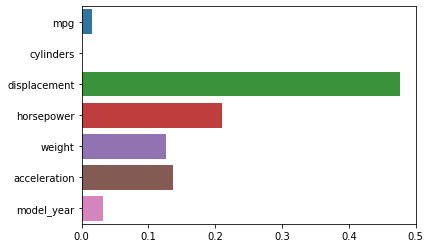

In [26]:
sns.barplot(x = model.feature_importances_, y = feature_names)

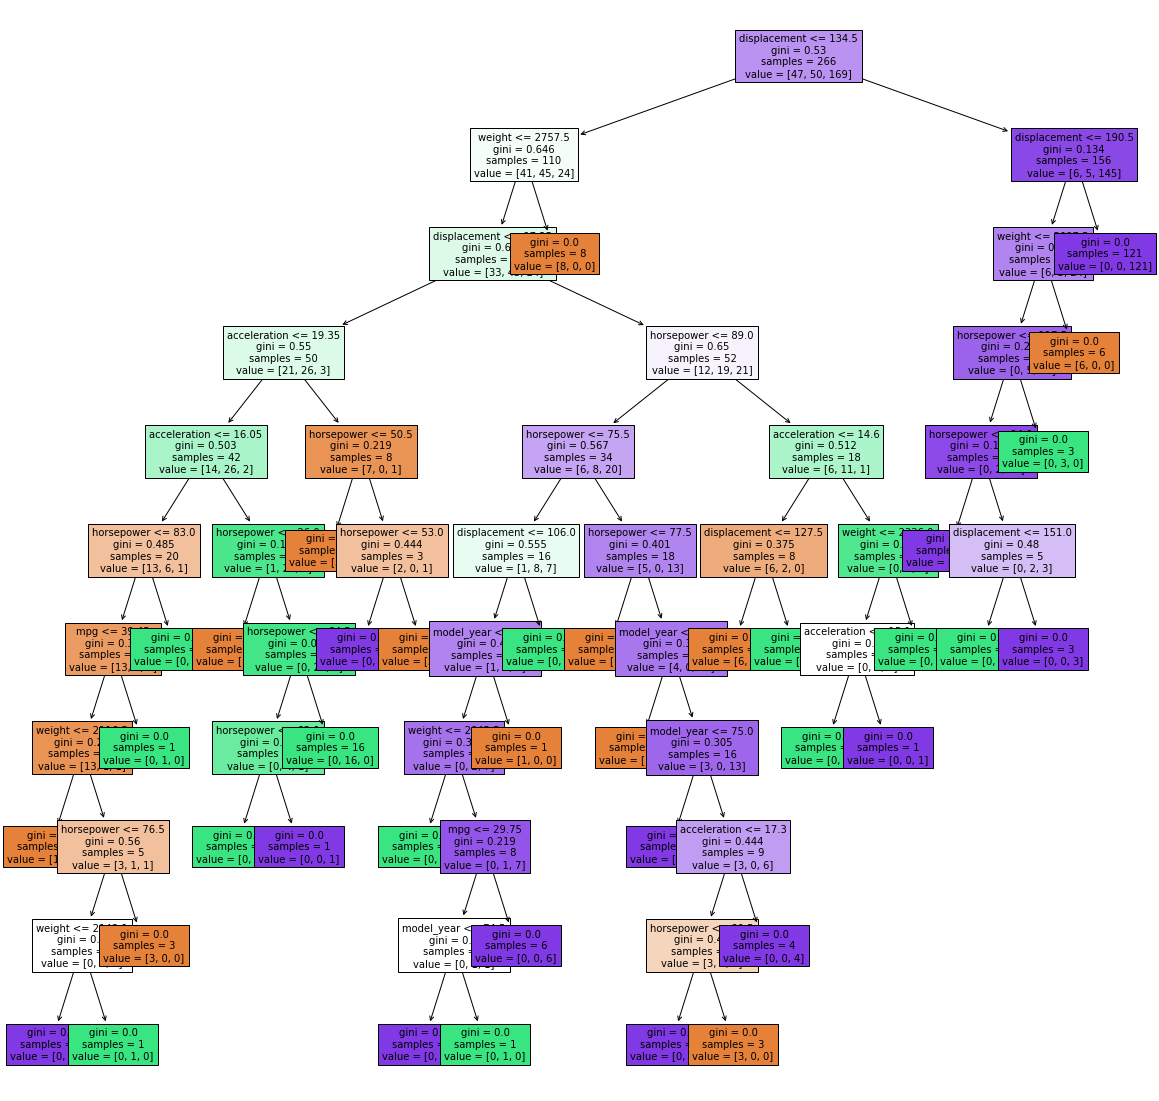

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

tree_gragh = plot_tree(model, filled=True, feature_names=feature_names, fontsize=10)

In [28]:
#위에 지니 불순도
1 - (47/266) ** 2 - (50/266) **2 -(169/266) ** 2

0.5297925264288541

In [29]:
from sklearn.tree import export_text

r = export_text(model, feature_names=feature_names)
print(r)

|--- displacement <= 134.50
|   |--- weight <= 2757.50
|   |   |--- displacement <= 97.25
|   |   |   |--- acceleration <= 19.35
|   |   |   |   |--- acceleration <= 16.05
|   |   |   |   |   |--- horsepower <= 83.00
|   |   |   |   |   |   |--- mpg <= 39.45
|   |   |   |   |   |   |   |--- weight <= 2116.50
|   |   |   |   |   |   |   |   |--- class: europe
|   |   |   |   |   |   |   |--- weight >  2116.50
|   |   |   |   |   |   |   |   |--- horsepower <= 76.50
|   |   |   |   |   |   |   |   |   |--- weight <= 2148.00
|   |   |   |   |   |   |   |   |   |   |--- class: usa
|   |   |   |   |   |   |   |   |   |--- weight >  2148.00
|   |   |   |   |   |   |   |   |   |   |--- class: japan
|   |   |   |   |   |   |   |   |--- horsepower >  76.50
|   |   |   |   |   |   |   |   |   |--- class: europe
|   |   |   |   |   |   |--- mpg >  39.45
|   |   |   |   |   |   |   |--- class: japan
|   |   |   |   |   |--- horsepower >  83.00
|   |   |   |   |   |   |--- class: japan
|   |   |   